In [1364]:
import pandas as pd
import numpy as np  
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import seaborn as sns
plt.style.use('seaborn-whitegrid') # Set the aesthetic style of the plots.
sns.set(style="white", color_codes=True)

# import matplotlib and set inline for jupyter notebook
import matplotlib.pyplot as plt

# Relationship
1. Scatter plot using Matplotlib
2. Marginal Histogram
3. Scatter plot using Seaborn
4. Pair Plot in Seaborn
5. Heat Map


In [1293]:
# Source: https://www.kaggle.com/benhamner/python-data-visualizations

# load the iris data
iris = datasets.load_iris()
type(iris.data)

# Build a DataFrame for iris dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
iris_df['species'] = iris_df['target'].map({0:iris.target_names[0],
                                            1:iris.target_names[1],
                                            2:iris.target_names[2]})
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [1294]:
# Let's see how many examples we have of each species
iris_df["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

# 1. Scatter Plot

Text(0, 0.5, 'sepal width (cm)')

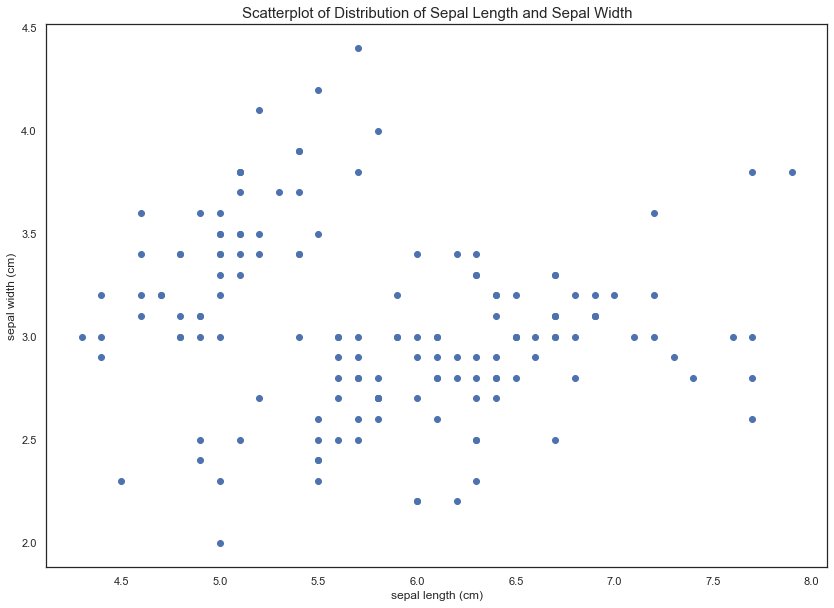

In [1295]:
#scatter plot of distribution of sepal length and sepal width

fig = plt.figure(figsize=(14,10))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.title('Scatterplot of Distribution of Sepal Length and Sepal Width', fontsize=15)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# 2. Marginal Histogram

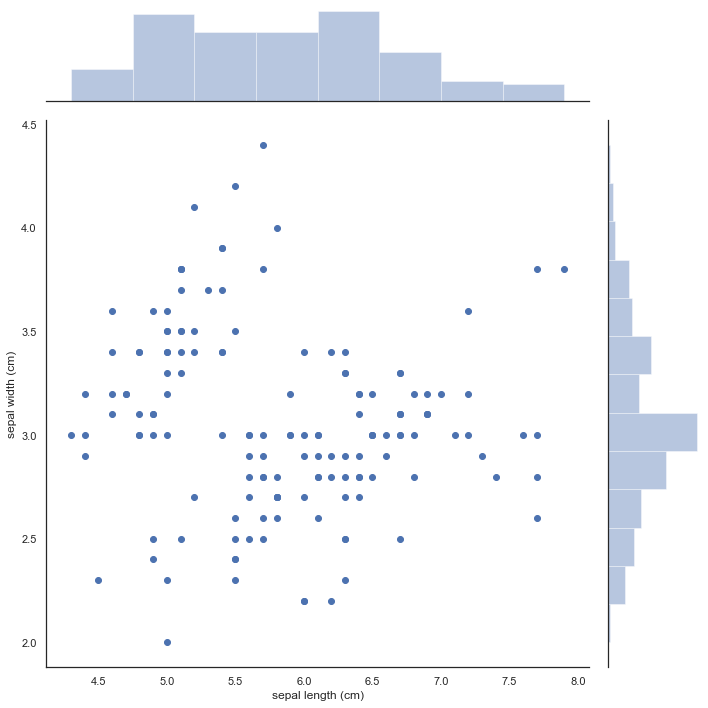

In [1296]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
p = sns.jointplot(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], height=10)

# 3. Scatter plot using Seaborn

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.0, 'Scatterplot with Seaborn')

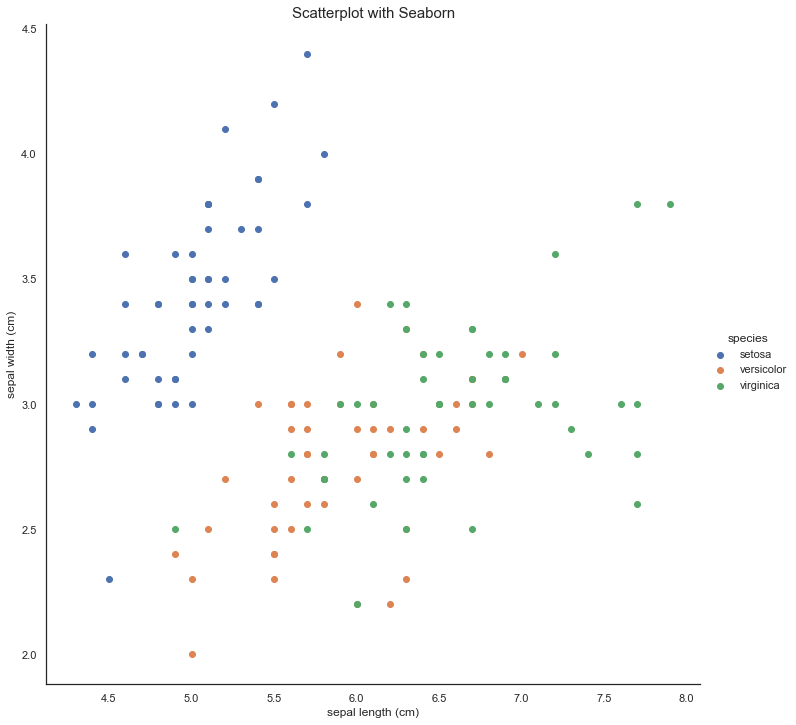

In [1297]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris_df, hue='species', size=10) \
   .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)') \
   .add_legend()
plt.title('Scatterplot with Seaborn', fontsize=15)

# 4. Pair plot

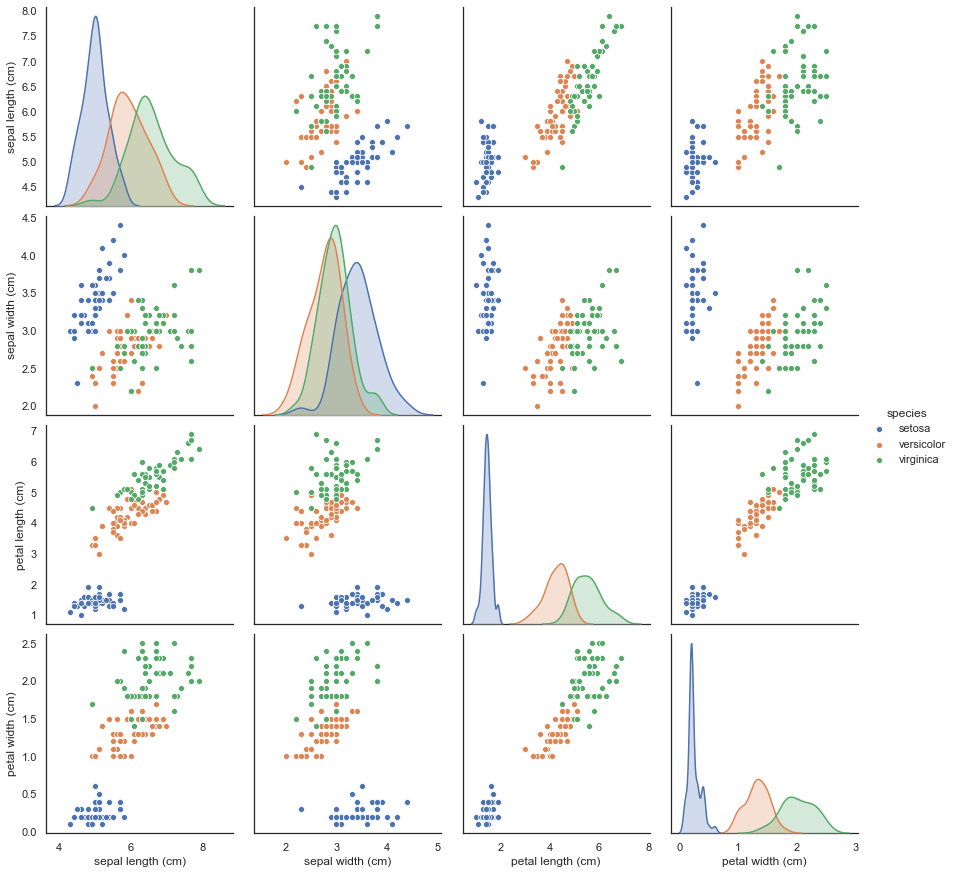

In [1298]:
# Another useful seaborn plot is the pair plot, 
# which shows the bivariate relationship between each pair of features. 
# From the pair plot, we'll see that the Iris-setosa species is separated 
# from the other two across all feature combinations
sns.pairplot(iris_df.drop("target", axis=1), hue="species", height=3)

# 5. Heat map


<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

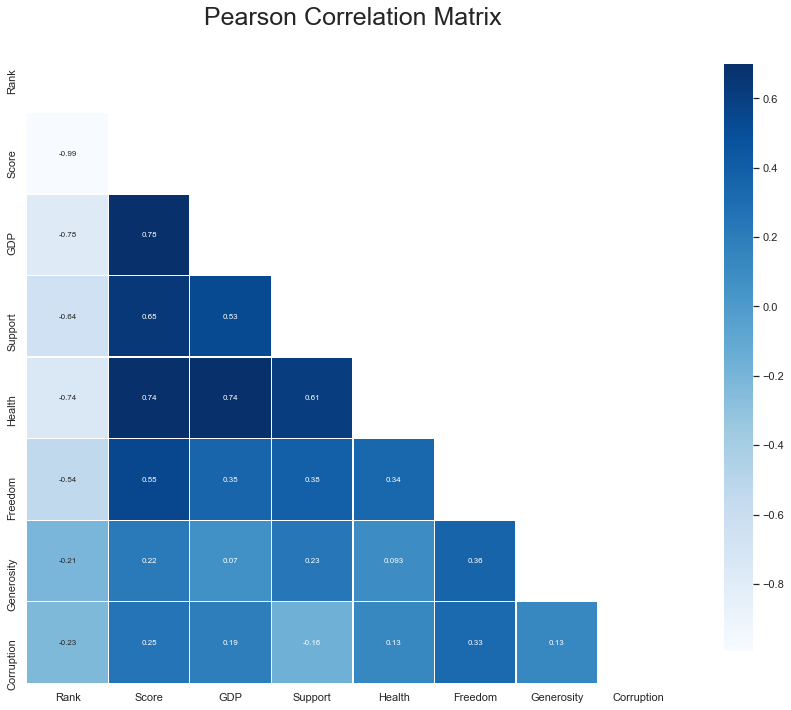

In [1299]:
happy = pd.read_csv('happiness_rank.csv')
# Correlation Among variables
usecols = ['Rank','Country','Score','GDP','Support',
                'Health','Freedom','Generosity','Corruption']
mask = np.zeros_like(happy[usecols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(happy[usecols].corr(),
                        linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

# Deviation plots
6. Line Chart

7. Area Chart

8. Stack Area Chart

9. Area Chart Unstacked

In [1325]:
# Build data frame from inputted data
data = pd.DataFrame(data = {'Month': ['Jan', 'Feb', 'March', 'April','May','June',
                                      'July', 'Aug', 'Sept', 'Oct','Nov','Dec'],
 'All Views': [728820, 862775, 1001285,817075,973996,877365,
              539134, 978768, 1792495, 569553, 989850, 1012303],
 'Internal Views': [374872, 466159, 578368,530037,608158,543964,
                   345293, 485921, 843923, 284741, 494991, 472819],
 'External Views': [260911, 301914,310423,197089,237425,226267,
                   193841, 492847, 948572, 284712, 494859, 539484]})
data.to_csv('Views.csv')
data

,Month,All Views,Internal Views,External Views
0,Jan,728820,374872,260911
1,Feb,862775,466159,301914
2,March,1001285,578368,310423
3,April,817075,530037,197089
4,May,973996,608158,237425
5,June,877365,543964,226267
6,July,539134,345293,193841
7,Aug,978768,485921,492847
8,Sept,1792495,843923,948572
9,Oct,569553,284741,284712


# 6. Line Chart

Text(0.5, 1.0, 'Line Chart of All Views')

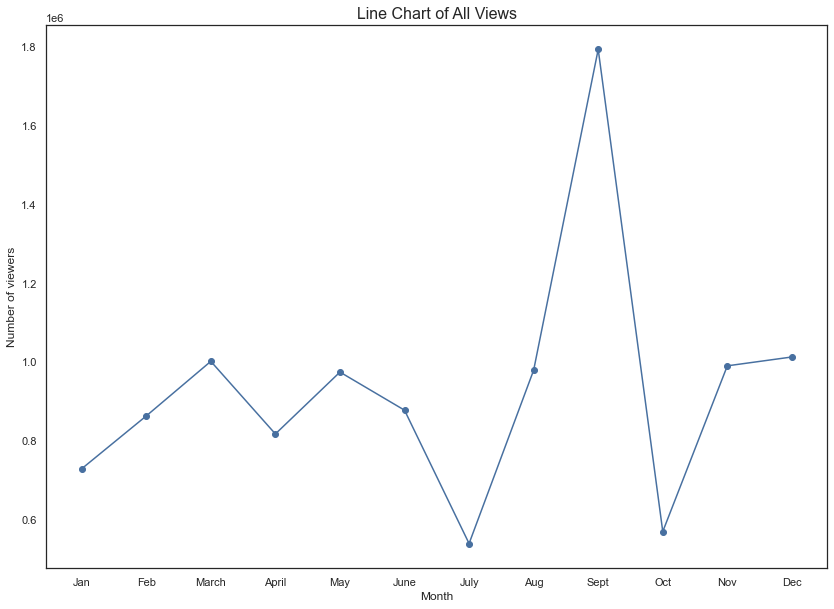

In [1330]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.plot(data['Month'], data['All Views'], color='#4870a0', marker='o')

# set label and title for the plot
plt.xlabel('Month')
plt.ylabel('Number of viewers')
plt.title('Line Chart of All Views', fontsize = 16)


# 7. Area Chart


Text(0.5, 1.0, 'Area Chart of External Views')

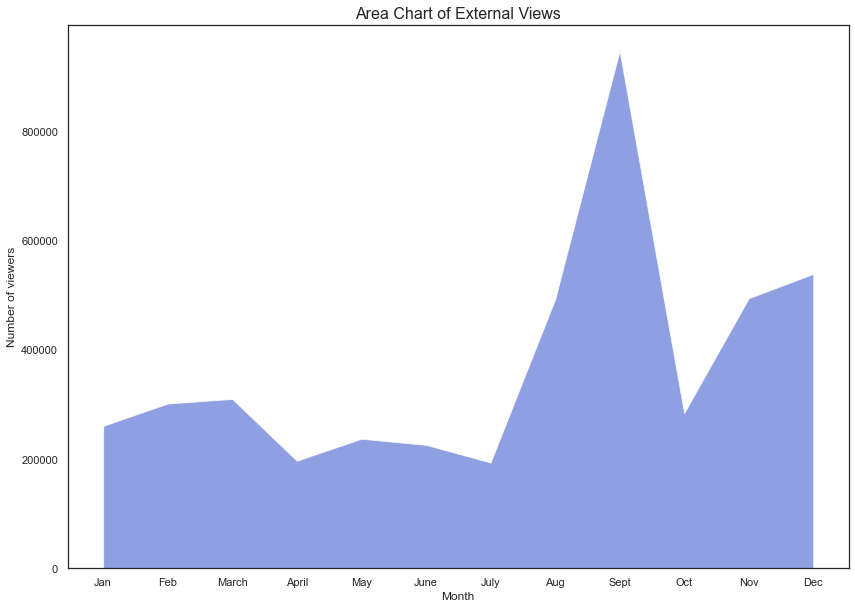

In [1333]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.stackplot(data['Month'], data['External Views'], colors='#7289da', alpha=0.8)

# set label and title for the plot
plt.xlabel('Month')
plt.ylabel('Number of viewers')
plt.title('Area Chart of External Views', fontsize = 16)


# 8. Stack Area Chart

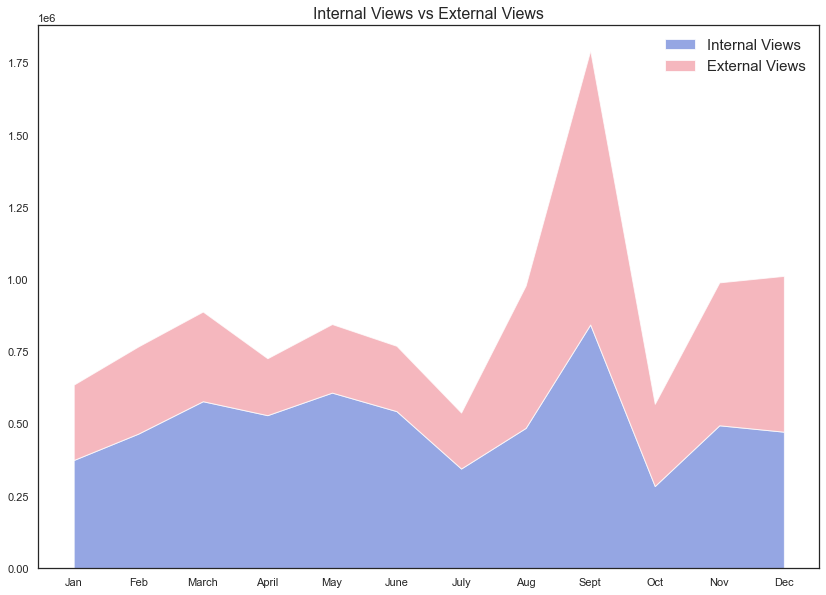

In [1343]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.stackplot(data['Month'], data['Internal Views'], data['External Views'],
              alpha=0.75,
              colors=['#7289da','#f29fa9'],
            labels=['Internal Views', 'External Views'])


# set a title and a legend
plt.title('Internal Views vs External Views', fontsize=16)
plt.legend(fontsize=15)

# 9. Area Chart Unstacked


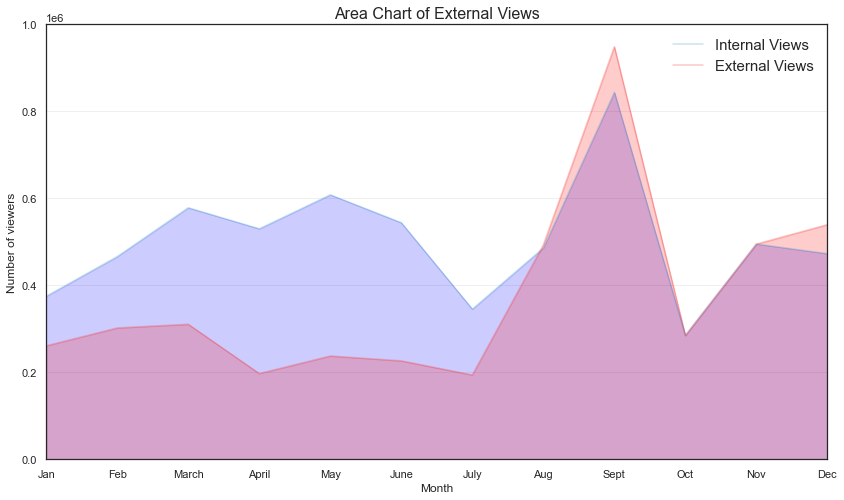

In [1363]:
# instanciate the figure
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot()

# plot the data
ax.plot(x, color='#49a7c3', alpha=0.3, label='Internal Views')
ax.plot(y, color='#f04747', alpha=0.3, label='External Views')

# fill the areas between the plots and the x axis
# this can create overlapping areas between lines
ax.fill_between(x.index, 0, x, color='blue', alpha=0.2)
ax.fill_between(x.index, 0, y, color='red', alpha=0.2)

# set ticks, label and title for the plot
plt.xticks(np.arange(12), data['Month'])
plt.xlabel('Month')
plt.ylabel('Number of viewers')
plt.title('Area Chart of External Views', fontsize = 16)


# change the x-ylim
ax.set_xlim(0, data.index[-1])
ax.set_ylim(0, 1e6)


# set a legend and the y grid for the plot
ax.legend(fontsize=15)
ax.grid(axis='y', alpha=0.3)

# Ranking Plot
11. Vertical Bar Chart
12. Horizontal Bar Chart
13. Multi-set Bar Chart
14. Stack Bar Chart
15. Lollipop Chart

# 11. Vertical Bar Chart


In [1230]:
car = pd.read_csv('mpg_ggplot2.csv')
car

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Text(0.5, 1.0, 'Number of Vehicles per Manufacturer')

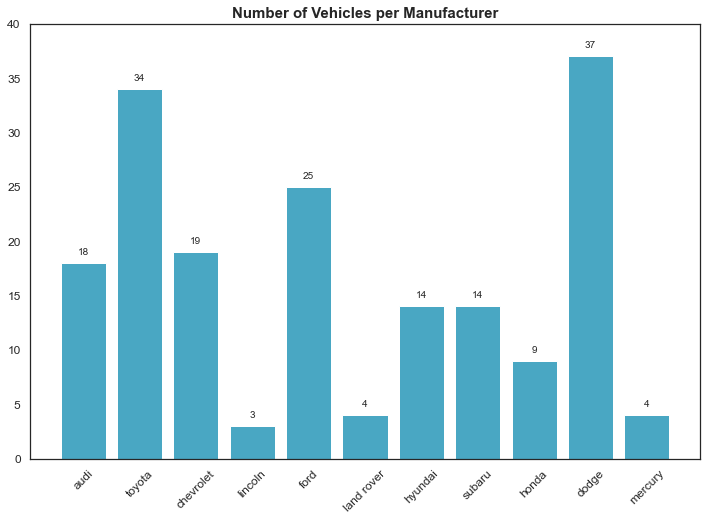

In [1275]:
# Vertical bar chart
# prepare data
value_count =  car["manufacturer"].value_counts(sort=False)
value_count = value_count[:11,]


# instanciate the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
ax.bar(value_count.index, value_count.values, color='#49a7c3') # color=colors to add color

# iterate over every x and y and annotate the value on the top of the barchart
for i, (k, v) in enumerate(value_count.items()):
    ax.text(k, # where to put the text on the x coordinates
            v + 1, # where to put the text on the y coordinates
            v, # value to text
            #color=colors[i], # color corresponding to the bar
            fontsize=10, # fontsize
            horizontalalignment='center', # center the text to be more pleasant
            verticalalignment='center'
           )


# size of the x and y ticks
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# change the ylim
ax.set_ylim(0, 40)

# set a title for the plot
ax.set_title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold')

# 12. Horizontal bar chart 

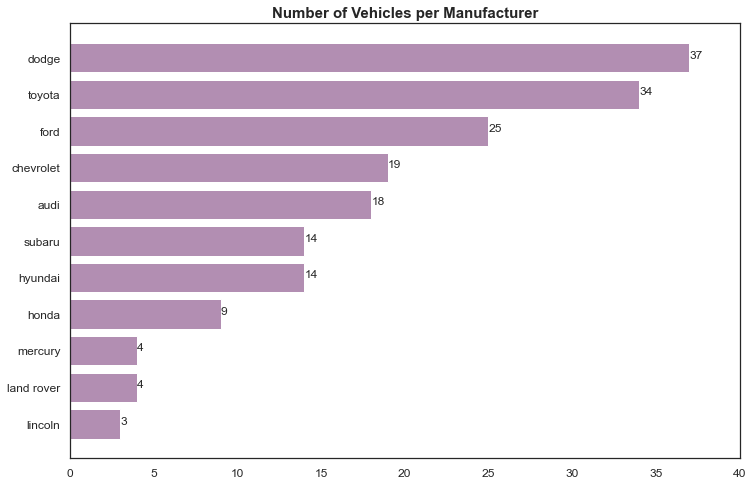

In [1232]:
value_count = value_count.sort_values()
# Vertical bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()


# plot the data using matplotlib
plt.barh(value_count.index, value_count.values, color='#b28eb2')

for index, value in enumerate(value_count.values):
    plt.text(value, index, str(value))


# size of the x and y ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# change the ylim
ax.set_xlim(0, 40)

# set a title for the plot
ax.set_title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold');

# 13. Multi-set Bar Chart

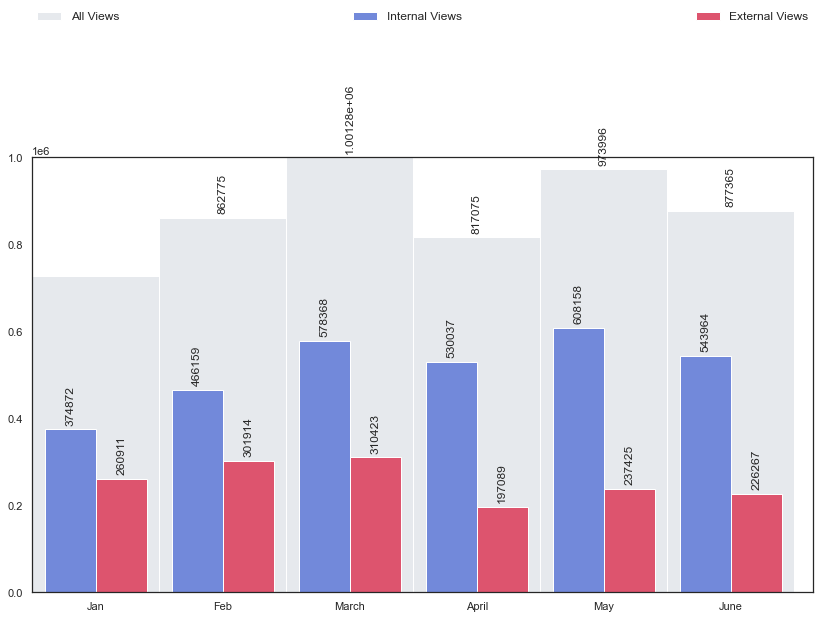

In [1279]:
views = pd.DataFrame(data, columns=['Month', 'All Views'])
df = pd.DataFrame(data, 
                  columns=['Month', 'Internal Views', 'External Views'])

# Plotting the bars
ax = views.plot.bar(rot=0,color='#E6E9ED',width=1, figsize=(14,8))
ax = df.plot.bar(rot=0, ax=ax, color=['#7289da', '#dd546e', '#99aab5', '#f3c366'], 
                 width=0.8, figsize=(14,8)) 


for p in ax.patches[1:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                   textcoords="offset points", ha="center", va="bottom")

ax.set_xlim(-0.5, None)
ax.margins(y=0)
ax.legend(ncol=len(df.columns), loc="lower left", bbox_to_anchor=(0,1.3,1,0.8), 
          borderaxespad=0, mode="expand", fontsize=12)
ax.set_xticklabels(df["Month"])
plt.show()

# 14. Stacked bar chart

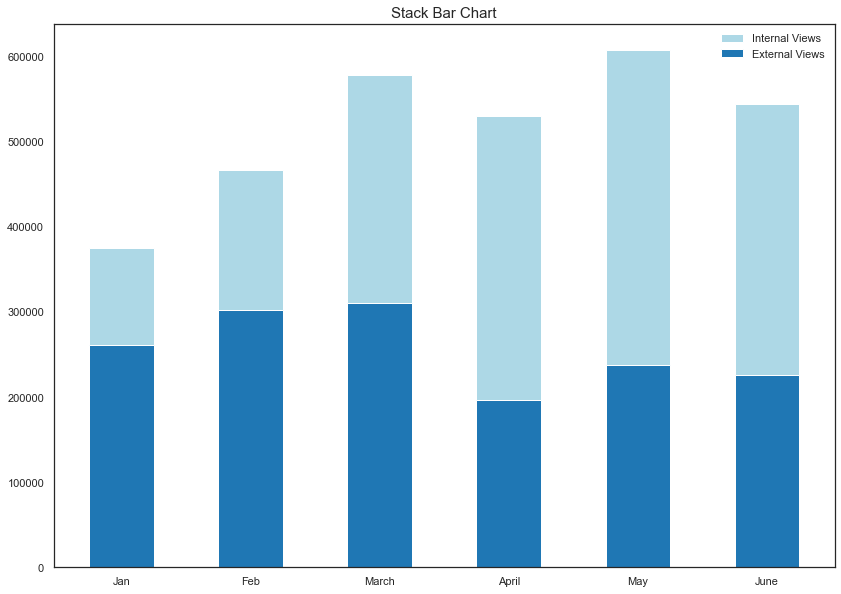

In [1236]:
fig = plt.figure(figsize=(14,10))
rect1 = plt.bar(data['Month'] ,data['Internal Views'],
                width=0.5, color='lightblue')
rect2 = plt.bar(data['Month'], data['External Views'],
                width=0.5, color='#1f77b4')

plt.legend((rect1[0], rect2[0]), ('Internal Views', 'External Views'))
plt.title('Stack Bar Chart', fontsize=15)
plt.show()

# 15. Lollipop Chart

Text(0.5, 1.0, 'Number of Vehicles per Manufacturer')

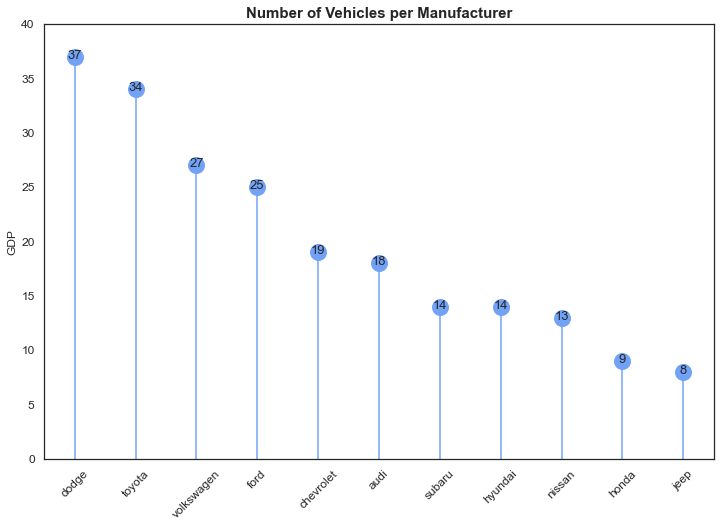

In [1237]:
# Horizontal bar chart
# prepare data
value_count =  car["manufacturer"].value_counts(sort=True)
value_count = value_count[:11,]
# create n colors based on the number of labels we have
# colors = [plt.cm.Spectral(i/float(len(d.keys()))) for i in range(len(d.keys()))]

# instanciate the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

(markerline, stemlines, baseline) = plt.stem(value_count.index, value_count.values)

# iterate over every x and y and annotate the value on the top of the barchart
for i, (k, v) in enumerate(value_count.items()):
    ax.text(k, # where to put the text on the x coordinates
            v + 0.1, # where to put the text on the y coordinates
            v, # value to text
            #color=colors[i], # color corresponding to the bar
            fontsize=13, # fontsize
            horizontalalignment='center', # center the text to be more pleasant
            verticalalignment='center'
           )

plt.setp(markerline, marker='o', markersize=15,
         markeredgewidth=2, color='#71a2f6')
plt.setp(stemlines, color='#71a2f6')
plt.setp(baseline, visible=False)
plt.tick_params(labelsize=12)
plt.ylabel('GDP', size=12)
plt.ylim(0, 40)
# size of the x and y ticks
plt.tick_params(axis='x', labelrotation=45, labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# set a title for the plot
plt.title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold')

# Distribution Plot
15. Histogram 
16. Density Curve with Histogram
17. Density Plot
18. Box Plot
19. Strip Plot
20. Violin Plot
21. Population Pyramid

# 15. Histogram

Text(0.5, 1.0, 'Histogram of Happiness Score')

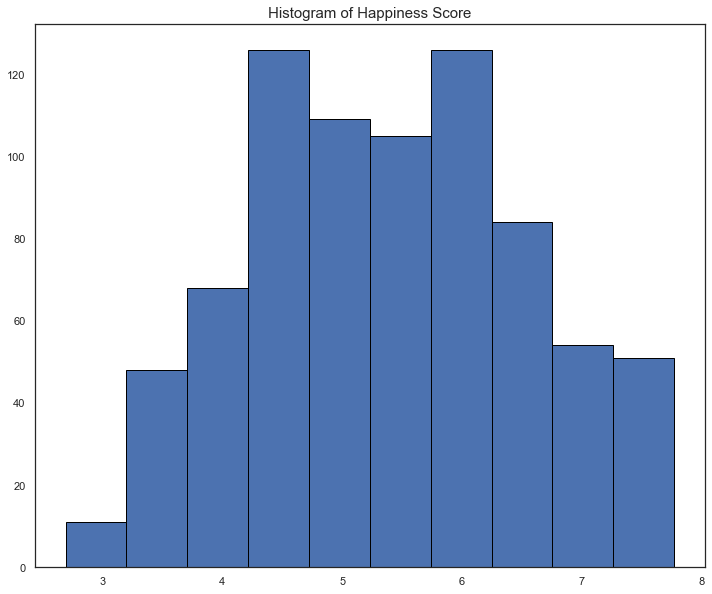

In [1281]:
fig = plt.figure(figsize=(12,10))
plt.hist(happy['Score'], edgecolor = 'black')
plt.title('Histogram of Happiness Score', fontsize=15)

# 16. Density Curve with Histogram

Text(0.5, 1.0, 'Density Plot and Histogram of Happiness Score')

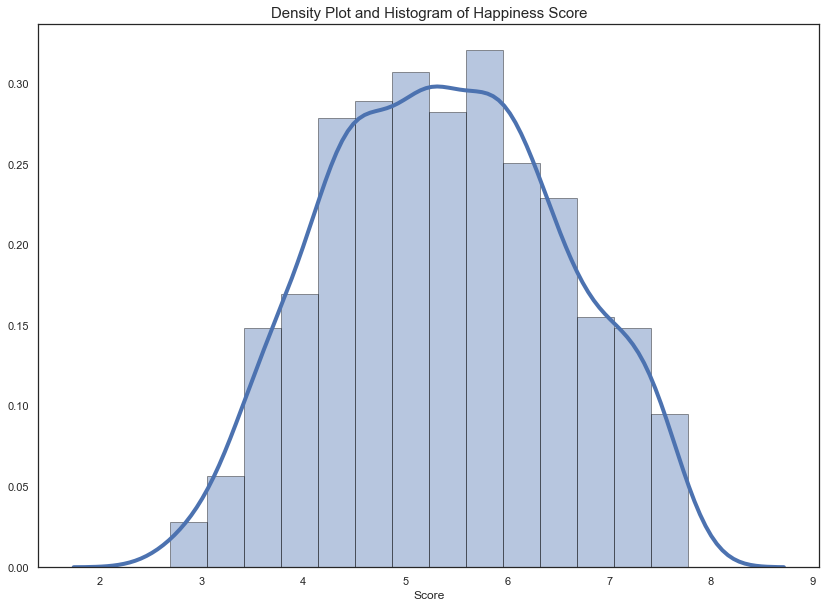

In [1239]:
fig = plt.figure(figsize=(14,10))
sns.distplot(happy['Score'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Density Plot and Histogram of Happiness Score', fontsize=15)

# 17. Density Plot


<AxesSubplot:>

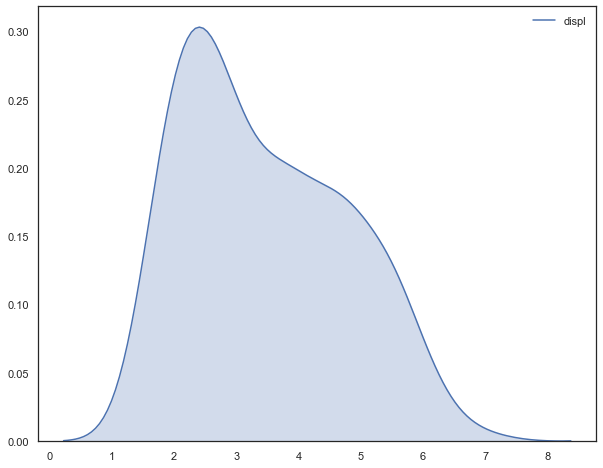

In [1283]:
# simple density plot
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
sns.kdeplot(car['displ'], shade=True)

Text(0.5, 1.0, 'Density Plot of City Mileage by vehicle type')

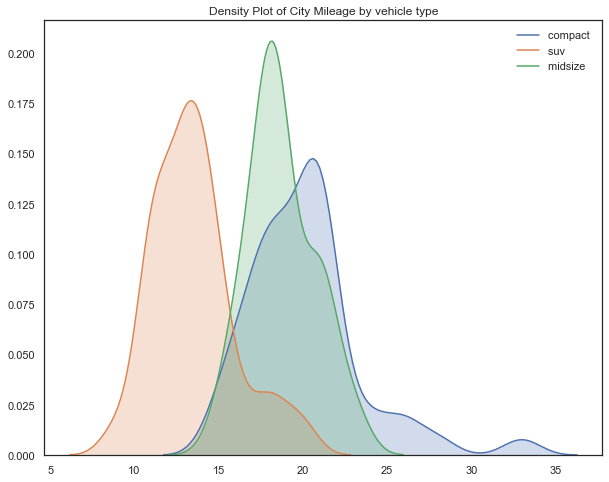

In [1241]:
# instanciate the figure
fig = plt.figure(figsize = (10, 8))

# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for class_ in ['compact', 'suv', 'midsize']:
    # extract the data
    x = car[car['class'] == class_]['cty']
    # plot the data using seaborn
    sns.kdeplot(x, shade=True, label = '{} '.format(class_))

# set the title of the plot
plt.title('Density Plot of City Mileage by vehicle type')

# 18. Box Plot

Text(0.5, 1.0, 'Box plor of Highway Mileage by Vehicle Class')

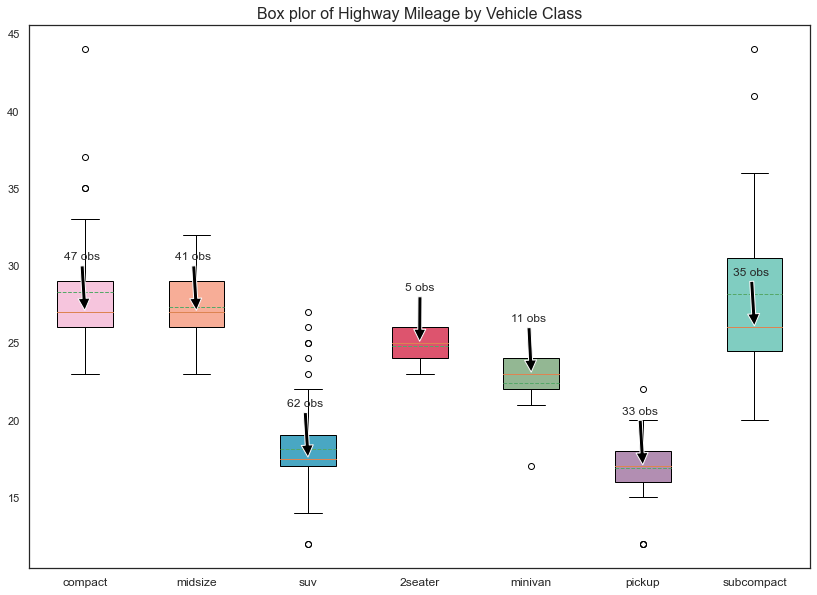

In [1242]:
# vectors to plot
vects = [car[car["class"]==cars]["hwy"] for cars in car["class"].unique()]

# labels for the x axis
labels = [class_ for class_ in car["class"].unique()]

# handpicked colors
colors = ['#f6c5dd', '#f7ad97', '#49a7c3', '#dd546e', '#93b793', '#b28eb2', '#80cdc1']



# instanciate the figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot()

# plot the data using matplotlib
plot1 = ax.boxplot(vects,
    notch=False, vert=True,
    meanline=True,showmeans=True,
    patch_artist=True
)

# iterate over every box and add some annotations
for box, color, vect, label, tick in zip(plot1['boxes'], # this line to iterate over every box
                                         colors, vects, labels, ax.get_xticks()):
    # change the color of the box
    box.set(facecolor=color)
    # add text
    ax.annotate("{} obs".format(len(vect)), 
                xy=(tick, np.median(vect)),
               xytext=(15, 60), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.03),
            horizontalalignment='right', verticalalignment='top',
            )


# prettify the plot
# change the x labels
ax.set_xticklabels(labels=labels)

# change the rotation and the size of the x ticks (numbers of x axis)
ax.tick_params(axis='x',labelsize=12)

# set the title for the plot
ax.set_title('Box plor of Highway Mileage by Vehicle Class', fontsize=16)

# 19. Strip Plot 

Text(0.5, 1.0, 'Strip Plot')

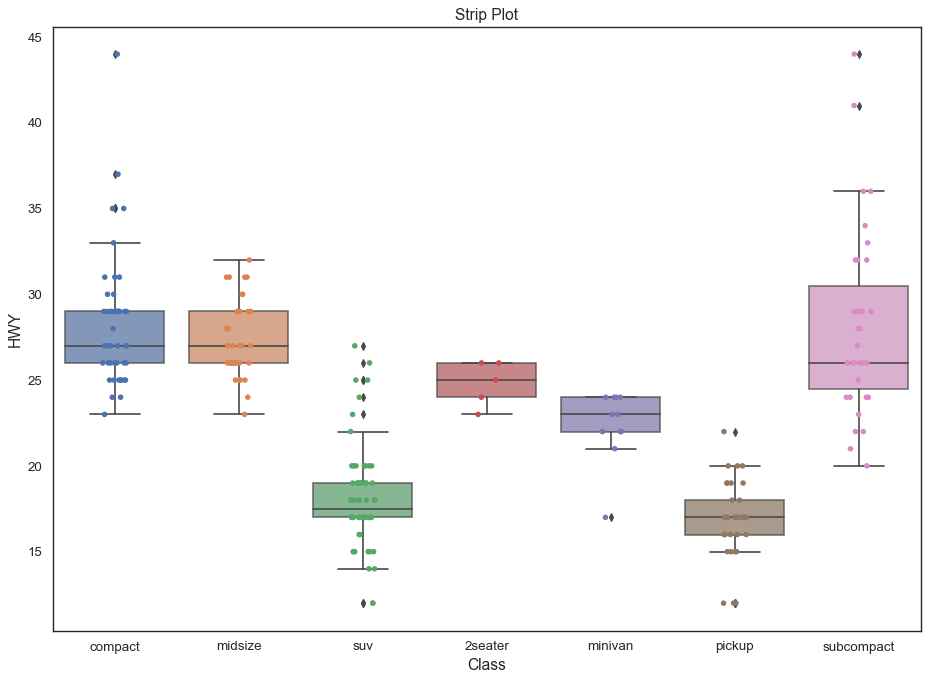

In [1243]:
plt.figure(figsize=(14, 10), dpi=80)

ax = sns.boxplot(car['class'], car['hwy'], boxprops=dict(alpha=0.75))
ax = sns.stripplot(car['class'], car['hwy'], jitter=True, edgecolor="gray")
# change the font of the x and y ticks (numbers on the axis)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# set and x and y label
ax.set_xlabel("Class", fontsize=14)
ax.set_ylabel("HWY", fontsize=14)

# set a title
ax.set_title("Strip Plot", fontsize=14)

# 20. Violin Plot

Text(0.5, 1.0, 'Violinplot')

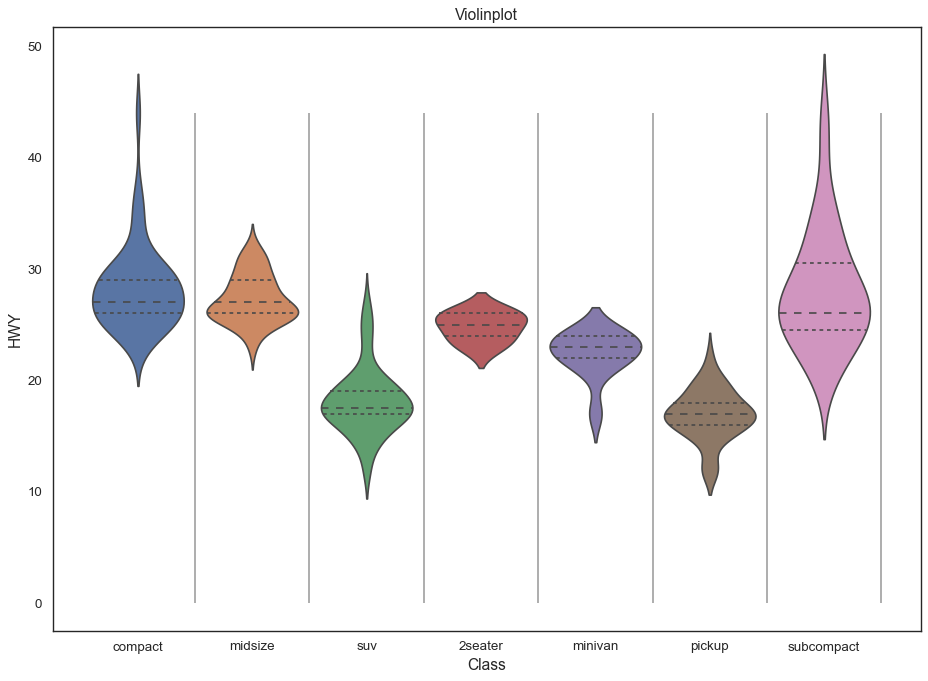

In [1244]:
plt.figure(figsize=(14, 10), dpi=80)
sns.violinplot(car['class'], car['hwy'],
               scale='width', inner='quartile')

# prettify the plot

# get the current figure
ax = plt.gca()
# get the xticks to iterate over
xticks = ax.get_xticks()

# iterate over every xtick and add a vertical line
# to separate different classes
for tick in xticks:
    ax.vlines(tick+0.5, 0, np.max(car["hwy"]), color="grey", alpha=0.75)
    
# rotate the x and y ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# add x and y label
ax.set_xlabel("Class", fontsize=14)
ax.set_ylabel("HWY", fontsize=14)

# set title
ax.set_title("Violinplot", fontsize=14)

# 21. Population Pyramid

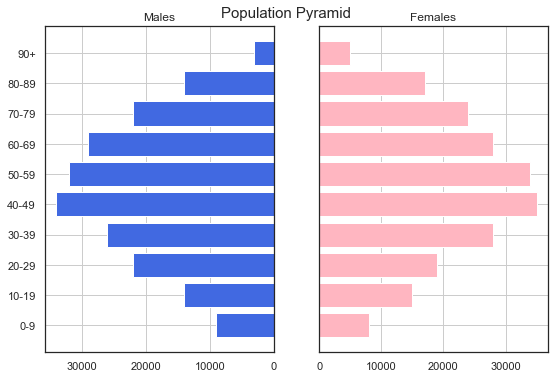

In [1248]:
#create dataframe
df = pd.DataFrame({'Age': ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'], 
                    'Male': [9000, 14000, 22000, 26000, 34000, 32000, 29000, 22000, 14000, 3000], 
                    'Female': [8000, 15000, 19000, 28000, 35000, 34000, 28000, 24000, 17000, 5000]})


#define x and y limits
y = range(0, len(df))
x_male = df['Male']
x_female = df['Female']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('white')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df['Age'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

# Comparision Plot
22. Bubble Chart
23. Bullet Chart
24. Pie Chart
25. Net Pie Chart
26. Donut Chart
27. TreeMap
28. Diverging Bar
29. Choropleth Map
30. Bubble Map

# 22. Bubble Chart

In [1287]:
happy = pd.read_csv('happiness_rank.csv')
'''Happiness score vs gdp per capital'''
px.scatter(happy, x="GDP", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")

# 23. Bullet Chart

In [1250]:
# Bullet Chart
import plotly.figure_factory as ff

data = (
  {"label": "Happiness", "sublabel":"score",
   "range": [5, 6, 8], "performance": [5.5, 6.5], "point": [7]},
  {"label": "Economy", "sublabel": "score", "range": [0, 1, 2],
   "performance": [1, 1.5], "sublabel":"score","point": [1.5]},
  {"label": "Family","sublabel":"score", "range": [0, 1, 2],
   "performance": [1, 1.5],"sublabel":"score", "point": [1.3]},
  {"label": "Freedom","sublabel":"score", "range": [0, 0.3, 0.6],
   "performance": [0.3, 0.4],"sublabel":"score", "point": [0.5]},
  {"label": "Trust", "sublabel":"score","range": [0, 0.2, 0.5],
   "performance": [0.3, 0.4], "point": [0.4]}
)


fig = ff.create_bullet(
    data, titles='label', subtitles='sublabel', markers='point',
    measures='performance', ranges='range', orientation='h',
    measure_colors=['#1e747c', '#7ac7bf'],
    range_colors=['#F5E1DA', '#F1F1F1']
   )
py.iplot(fig, filename='bullet chart from dict')

# 24. Pie Chart

Text(0.5, 1.0, 'Pie Chart')

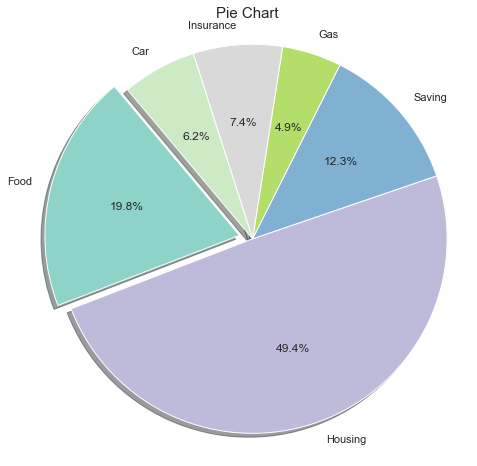

In [1251]:
fig = plt.figure(figsize=(8,8))
labels = 'Food', 'Housing', 'Saving', 'Gas', 'Insurance', 'Car'
spend = [800, 2000, 500, 200, 300, 250]

# create n colors based on the number of labels we have
colors = [plt.cm.Set3(i/float(len(labels))) for i in range(len(labels))]
                                                              
p = plt.pie(spend, # Value
            labels=labels, # Labels for each sections
            explode=(0.07, 0, 0, 0, 0, 0), # To slice the perticuler section
            colors=colors, # Color of each section
            autopct='%1.1f%%', # Show data in persentage for with 1 decimal point
            startangle=130, # Start angle of first section
            shadow=True # Showing shadow of pie chart
           )


plt.axis('equal')

plt.title('Pie Chart', fontsize=15)

# 25. Net Pie Chart

Text(0.5, 1.0, 'Nested Pie Chart')

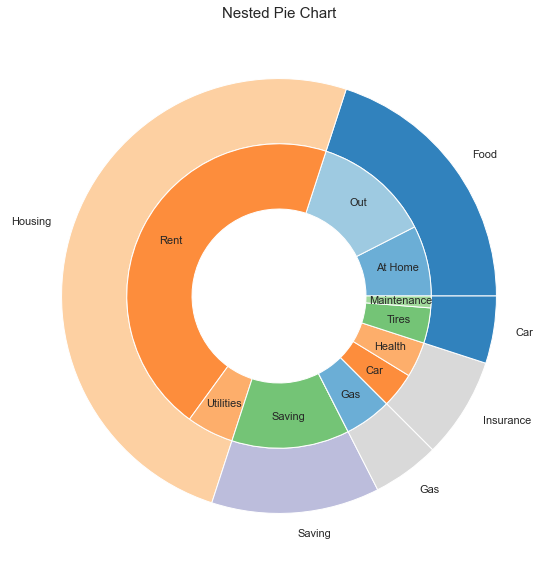

In [1252]:
# get the data
size = 0.3
labels = 'Food', 'Housing', 'Saving', 'Gas', 'Insurance', 'Car'
spend = [800, 2000, 500, 200, 300, 250]
vals = np.array([[300., 500.], [1800., 200.], [500., 0.],[200., 0.], [150., 150.],[150., 50]])
in_labels = 'At Home','Out', 'Rent','Utilities','Saving','', 'Gas','','Car','Health','Tires','Maintenance'
# create the outer and inner colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*7)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

# instanciate the figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot()

# plot the data
# outer level
ax.pie(vals.sum(axis=1), # plot the total [60., 32.] = 92
       radius=1, # Radius to increase or decrease the size of pie chart 
       labels=labels, # Labels for each sections
       colors=outer_colors, # Color of each section
       wedgeprops=dict(width=size, edgecolor='w') # Add edges to each portion/slice of the pie
      )

# inner level
patches, texts = ax.pie(vals.flatten(), # using flatten we plot 60, 32 separetly
       radius=1-size,
       labels=in_labels,
       labeldistance=0.8,
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

for t in texts:
    t.set_horizontalalignment('center')


# set the title for the plot
plt.title('Nested Pie Chart', fontsize=15)

# 26. Donut Chart

In [1253]:
df15 = pd.read_csv('2015.csv')
d2015 = df15['Region'].value_counts()

label_d2015 = d2015.index
size_d2015 = d2015.values


colors = ['#4870a0', '#eb96aa', '#7ac7bf', '#b28eb2', '#d9a3d8',
         '#f3c366','#a1cdec', '#38b6ff','#92406e','#f5907b']

trace = go.Pie( labels=label_d2015,
               values=size_d2015,
               marker=dict(colors = colors),
               name='2015', 
               hole=0.3)

data = [trace]

layout1 = go.Layout(
           title='Regions')

fig = go.Figure(data=data, layout=layout1)

py.iplot(fig)

# 27. Tree Map

Text(0.5, 1.0, 'Treemap Using External Libraries')

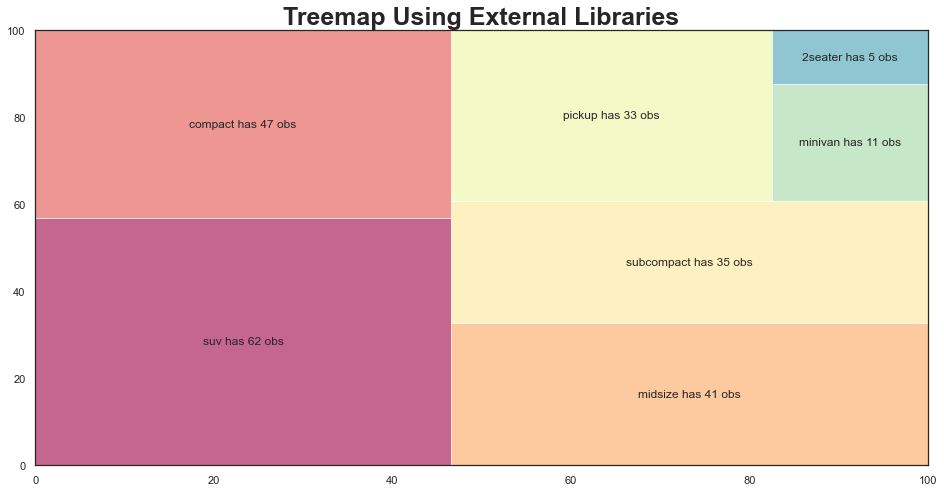

In [1209]:
import squarify

# prepare the data for plotting
# get the values
label_value = car['class'].value_counts().to_dict()

# create the labels using a list comprehesion
labels = ['{} has {} obs'.format(class_, obs) for class_, obs in label_value.items()]

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]


# instanciate the figure
fig = plt.gcf()
fig.set_size_inches(16,8)

# plot the data using squarify
squarify.plot(sizes=label_value.values(), label=labels, color=colors, alpha=0.6)

# prettify the plot
# add a title to the plot
plt.title('Treemap Using External Libraries', fontsize=25, fontweight='bold')

# 28. Diverging Bar Chart

([<matplotlib.axis.YTick at 0x7f9bb0aee730>,
 [Text(0, 0, 'Boston'),
  Text(0, 1, 'Pittsburgh'),
  Text(0, 2, 'Minneapolis'),
  Text(0, 3, 'Baltimore'),
  Text(0, 4, 'Philadelphia'),
  Text(0, 5, 'St. Louis'),
  Text(0, 6, 'San Francisco'),
  Text(0, 7, 'Detroit'),
  Text(0, 8, 'Washington, D.C.'),
  Text(0, 9, 'Seattle'),
  Text(0, 10, 'New York'),
  Text(0, 11, 'Portland'),
  Text(0, 12, 'Denver'),
  Text(0, 13, 'Chicago'),
  Text(0, 14, 'All Metro Areas'),
  Text(0, 15, 'Charlotte'),
  Text(0, 16, 'San Diego'),
  Text(0, 17, 'Phoenix'),
  Text(0, 18, 'Tampa'),
  Text(0, 19, 'Atlanta'),
  Text(0, 20, 'Riverside, Calif.'),
  Text(0, 21, 'San Antonio'),
  Text(0, 22, 'Los Angeles'),
  Text(0, 23, 'Dallas'),
  Text(0, 24, 'Houston'),
  Text(0, 25, 'Miami')])

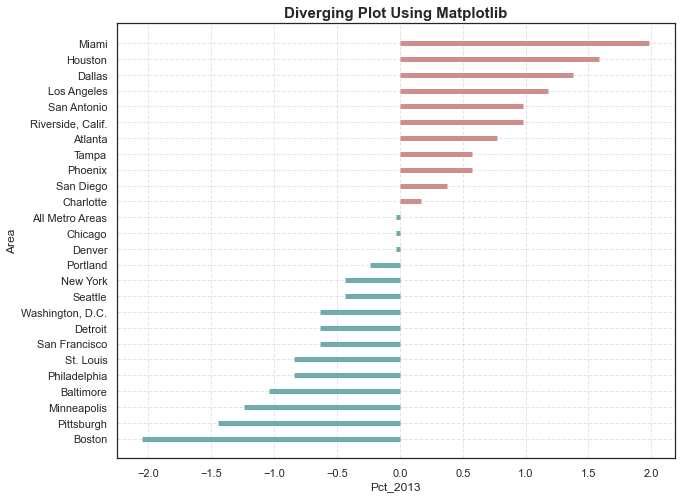

In [1211]:
health = pd.read_csv('health.csv')
# prepare the data for plotting
# here we standarize the data
# More info:
# https://statisticsbyjim.com/glossary/standardization/
health['x_plot'] = (health['pct_2013'] - health['pct_2013'].mean())/health['pct_2013'].std()

# sort value and reset the index
health.sort_values('x_plot', inplace = True)
health.reset_index(inplace = True)

# create a color list, where if value is above > 0 it's green otherwise red
colors = ['#71abab' if x < 0 else '#ce8e8e' for x in health['x_plot']]

# instanciate the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
# plot using horizontal lines and make it look like a column by changing the linewidth
ax.hlines(y=health.index, xmin=0 , xmax=health['x_plot'],  color=colors, linewidth=5)

# prettify the plot
# set x and y axis
ax.set_xlabel('Pct_2013')
ax.set_ylabel('Area')

# set a title
ax.set_title('Diverging Plot Using Matplotlib', fontsize=15, fontweight='bold')

# make a grid to help separate the lines
ax.grid(linestyle='--', alpha=0.5)

# change the y ticks
# first you set the yticks
# then you change them using the area names

plt.yticks(health.index, health.Area)


# 29. World Map

In [1254]:
'''World Map
Happiness Rank Accross the World'''

happiness_rank = dict(type='choropleth', 
           locations=happy['Country'],
           locationmode='country names',
           z=happy['Rank'], 
           text=happy['Country'],
           colorscale='bluyl',
           autocolorscale=False,
           reversescale=True,
           marker_line_color='darkgray',
           marker_line_width=0.5)
layout = dict(title='Happiness Rank Across the World', 
             geo=dict(showframe=False, 
                       projection={'type': 'equirectangular'}))
world_map_1 = go.Figure(data=[happiness_rank], layout=layout)
iplot(world_map_1)

# 30. Bubble Map

In [1288]:
# to use unverified ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
covid.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,03/09/2020,3,9,2020,38,3,Afghanistan,AF,AFG,38041757.0,Asia,1.272286
1,02/09/2020,2,9,2020,9,0,Afghanistan,AF,AFG,38041757.0,Asia,1.592986
2,01/09/2020,1,9,2020,34,4,Afghanistan,AF,AFG,38041757.0,Asia,1.569328
3,31/08/2020,31,8,2020,19,0,Afghanistan,AF,AFG,38041757.0,Asia,1.487839
4,30/08/2020,30,8,2020,3,0,Afghanistan,AF,AFG,38041757.0,Asia,1.556185
5,29/08/2020,29,8,2020,11,1,Afghanistan,AF,AFG,38041757.0,Asia,1.863741
6,28/08/2020,28,8,2020,3,0,Afghanistan,AF,AFG,38041757.0,Asia,1.853227
7,27/08/2020,27,8,2020,55,4,Afghanistan,AF,AFG,38041757.0,Asia,2.053007
8,26/08/2020,26,8,2020,1,0,Afghanistan,AF,AFG,38041757.0,Asia,2.108210
9,25/08/2020,25,8,2020,71,10,Afghanistan,AF,AFG,38041757.0,Asia,2.670749


In [1289]:
# Remove unuseful columns
covid = covid[['dateRep', 'cases', 'deaths', 'countriesAndTerritories', 'countryterritoryCode', 'continentExp']]
# Rename columns
covid = covid.rename(columns={
    'dateRep': 'date',
    'countriesAndTerritories': 'country',
    'countryterritoryCode': 'countryCode',
    'continentExp': 'continent'
})
# Convert string to datetime
covid['date'] = pd.to_datetime(covid['date'], format='%d/%m/%Y')
# Preview the data frame
covid.sample(10)

,date,cases,deaths,country,countryCode,continent
26975,2020-06-25,0,0,Nicaragua,NIC,America
34080,2020-08-07,20,1,South_Korea,KOR,Asia
37725,2020-04-18,0,0,Uganda,UGA,Africa
317,2020-06-16,69,0,Albania,ALB,Europe
16775,2020-06-06,0,0,Holy_See,VAT,Europe
11121,2020-04-29,1018,208,Ecuador,ECU,America
13375,2020-07-16,927,91,France,FRA,Europe
4614,2020-07-27,1148,48,Bolivia,BOL,America
15013,2020-06-04,0,0,Greece,GRC,Europe
35626,2020-05-28,0,0,Switzerland,CHE,Europe


In [1290]:
from datetime import datetime
# Get today as string
today = datetime.now().strftime('%Y-%m-%d')
# Get a data frame only for today
df_today = covid[covid.date == today]
# Preview the data frame
df_today.head()

,date,cases,deaths,country,countryCode,continent
0,2020-09-03,38,3,Afghanistan,AFG,Asia
238,2020-09-03,122,6,Albania,ALB,Europe
417,2020-09-03,325,7,Algeria,DZA,Africa
660,2020-09-03,15,0,Andorra,AND,Europe
834,2020-09-03,75,1,Angola,AGO,Africa


In [1291]:
import plotly.express as px
fig = px.scatter_geo(
    df_today, # provide the Pandas data frame
    locations='countryCode', # indicate locations
    color='continent',
    hover_name='country', # what to display when the mouse hovering on the bubble
    size='cases', # how large the bubble is
    projection='equirectangular',
    title=f'World COVID-19 Cases for {today}'
)
fig.show()